# Домашняя работа по теме «Временные ряды, общая теория»

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## 1. international-airline-passengers (из примера)

In [6]:
series = pd.read_csv("international-airline-passengers.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


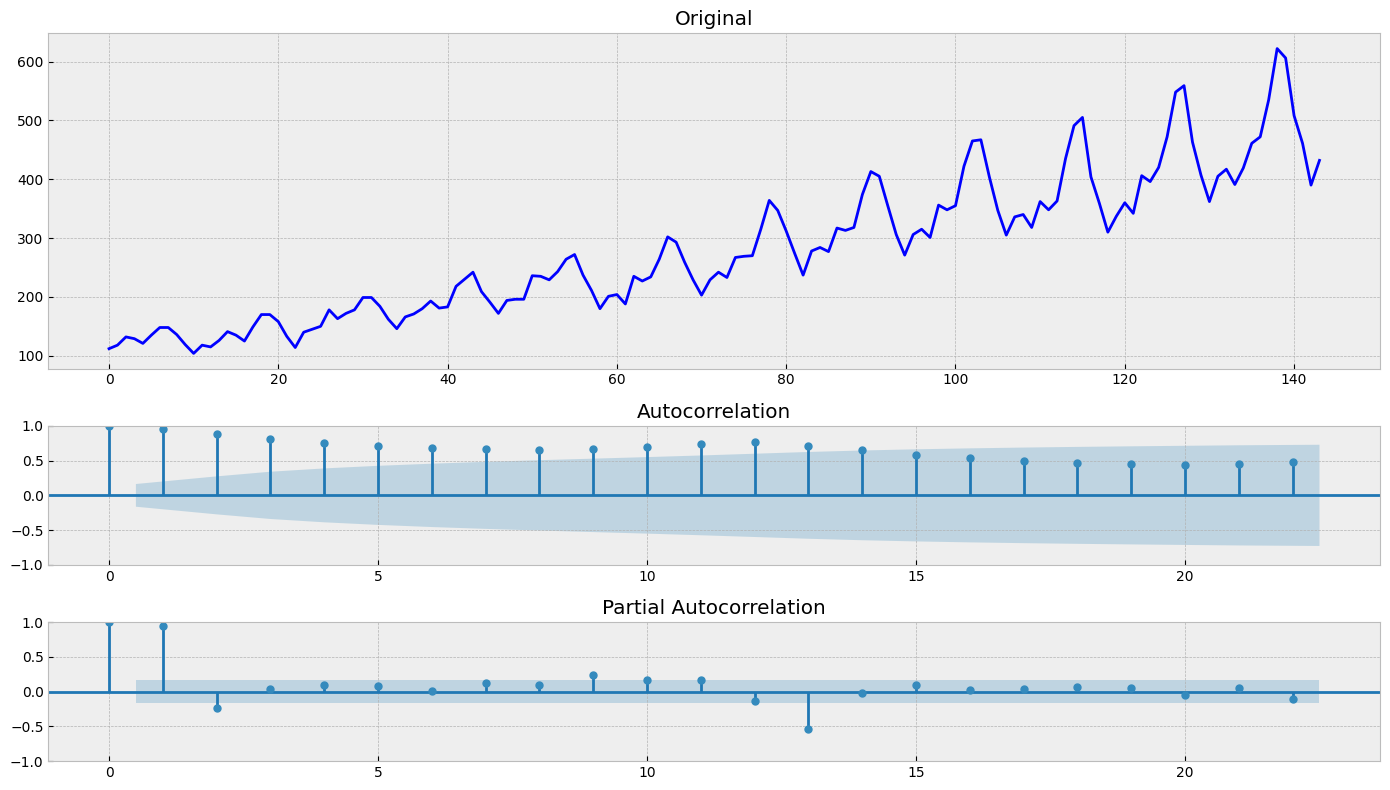

In [7]:
tsplot(series)

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [8]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


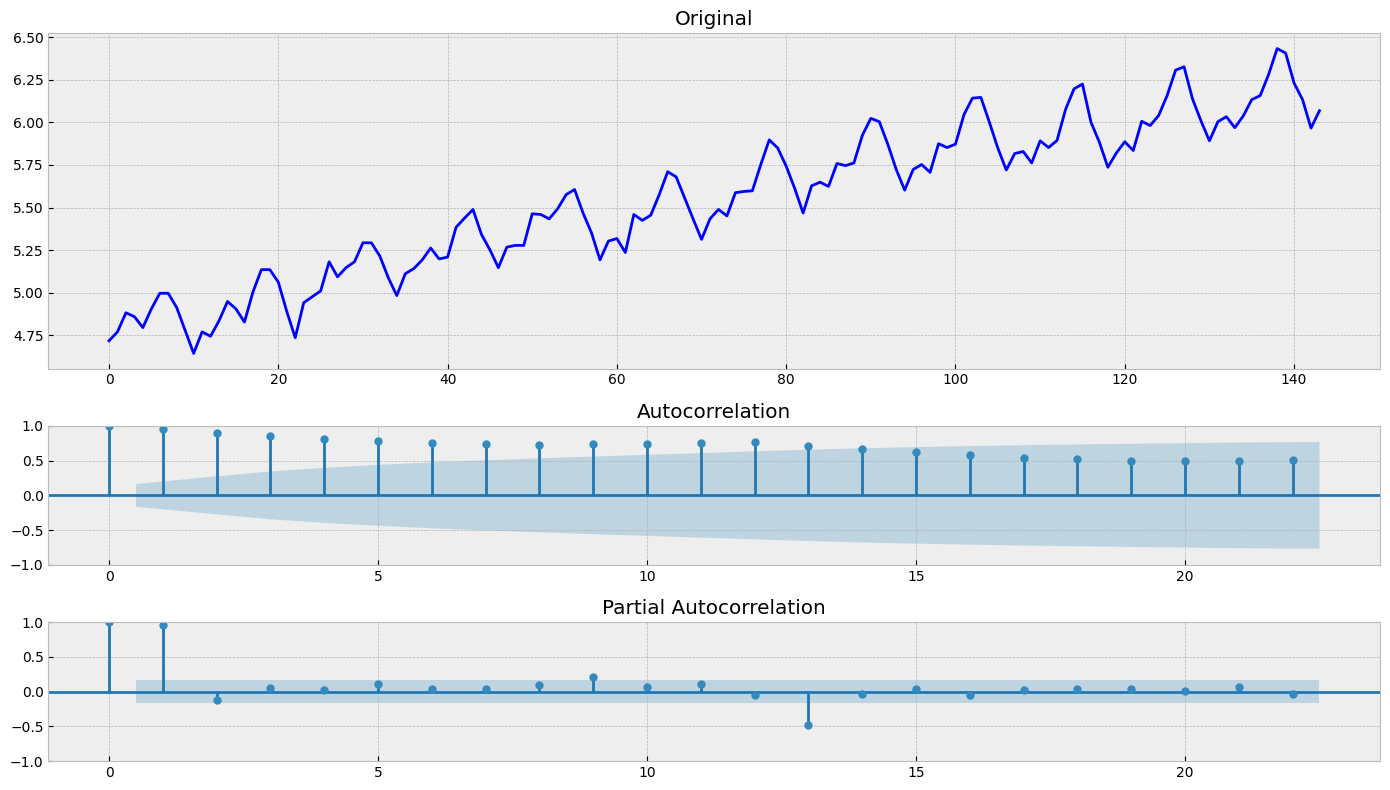

In [9]:
tsplot(series)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [10]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


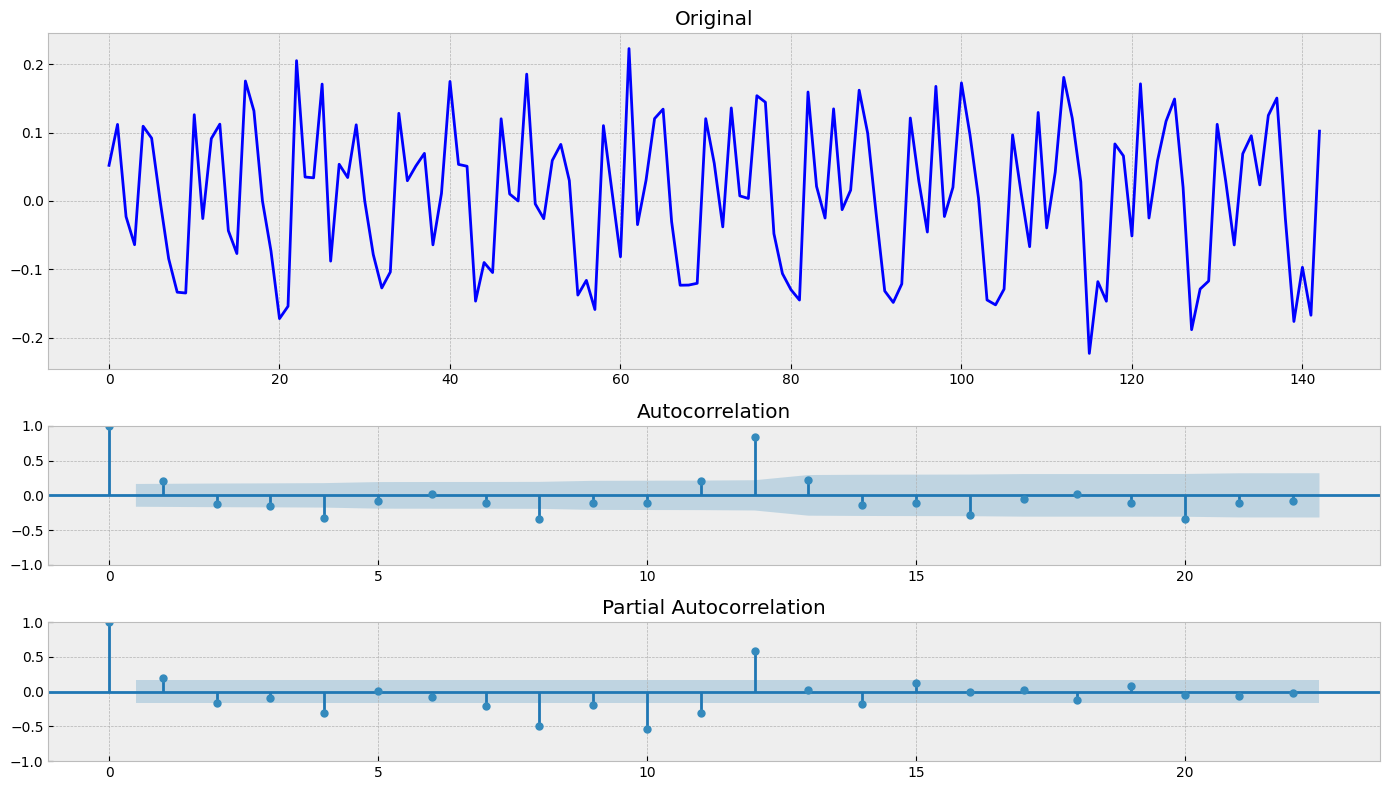

In [11]:
tsplot(series)

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

In [12]:
series = series[12:] - series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


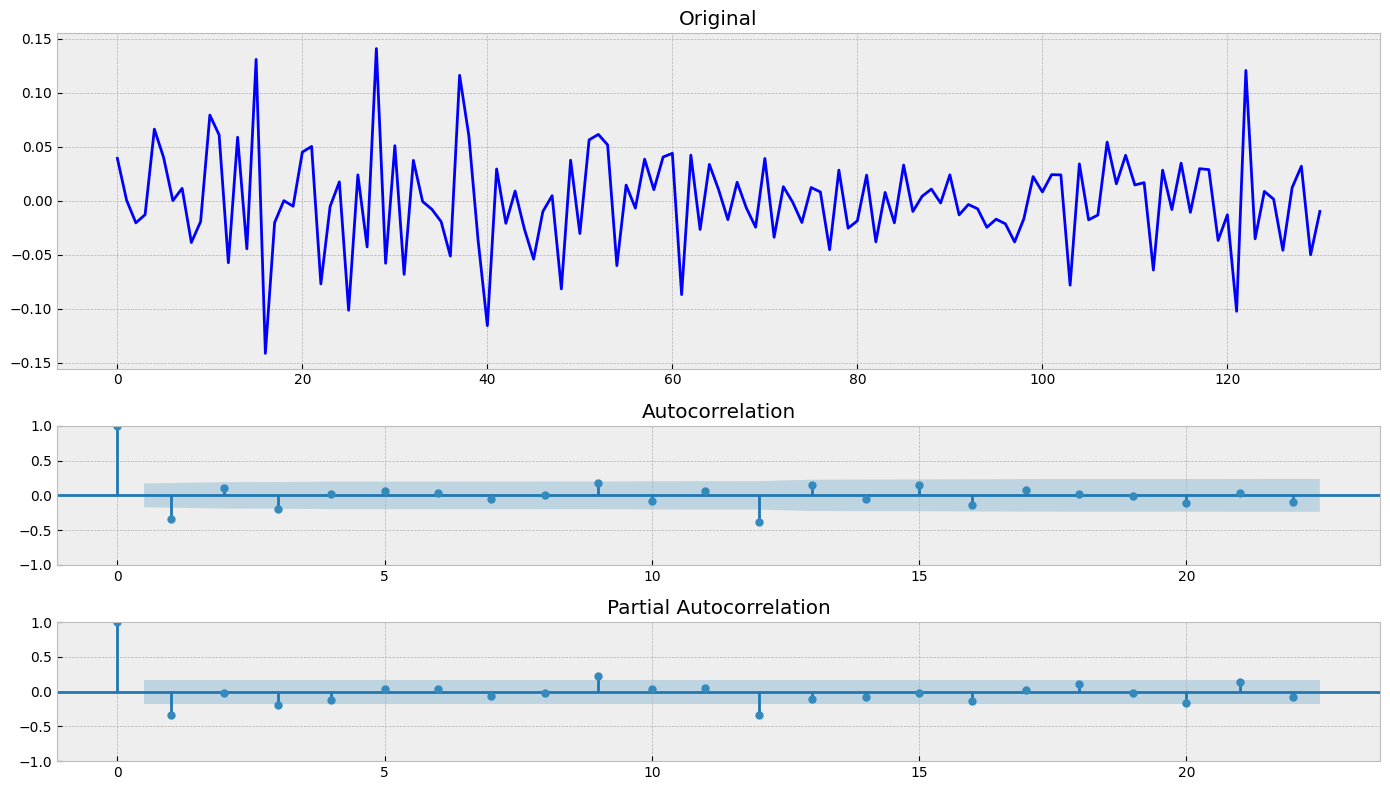

In [13]:
tsplot(series)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

## 2. monthly-sales-of-company-x-jan-6

In [14]:
series_2 = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


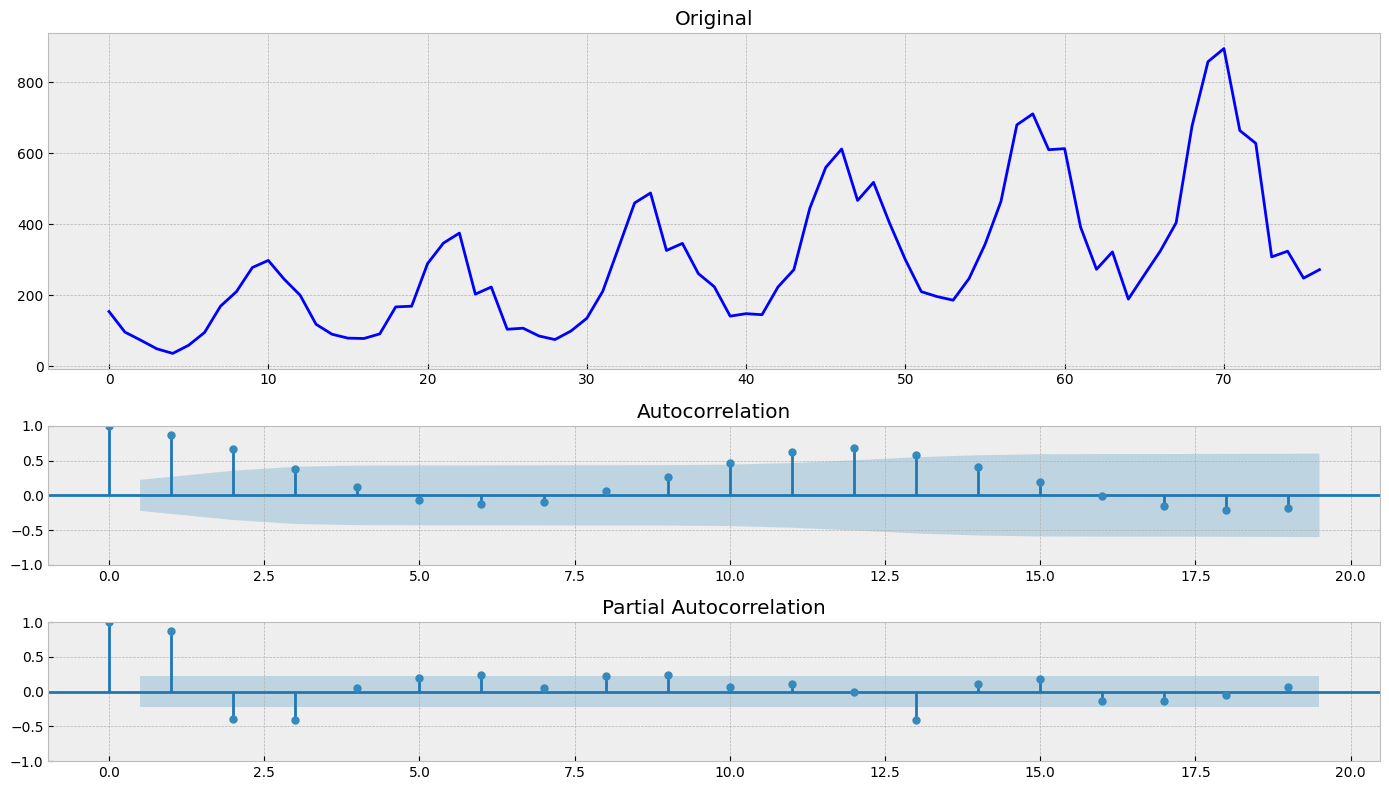

In [15]:
tsplot(series_2)

Судя по результатам теста Дики-Фуллера и по графикам коррелограмм ряд нестационарен. Присутствует тренд и сезонность.

Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [16]:
series_2 = boxcox(series_2, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


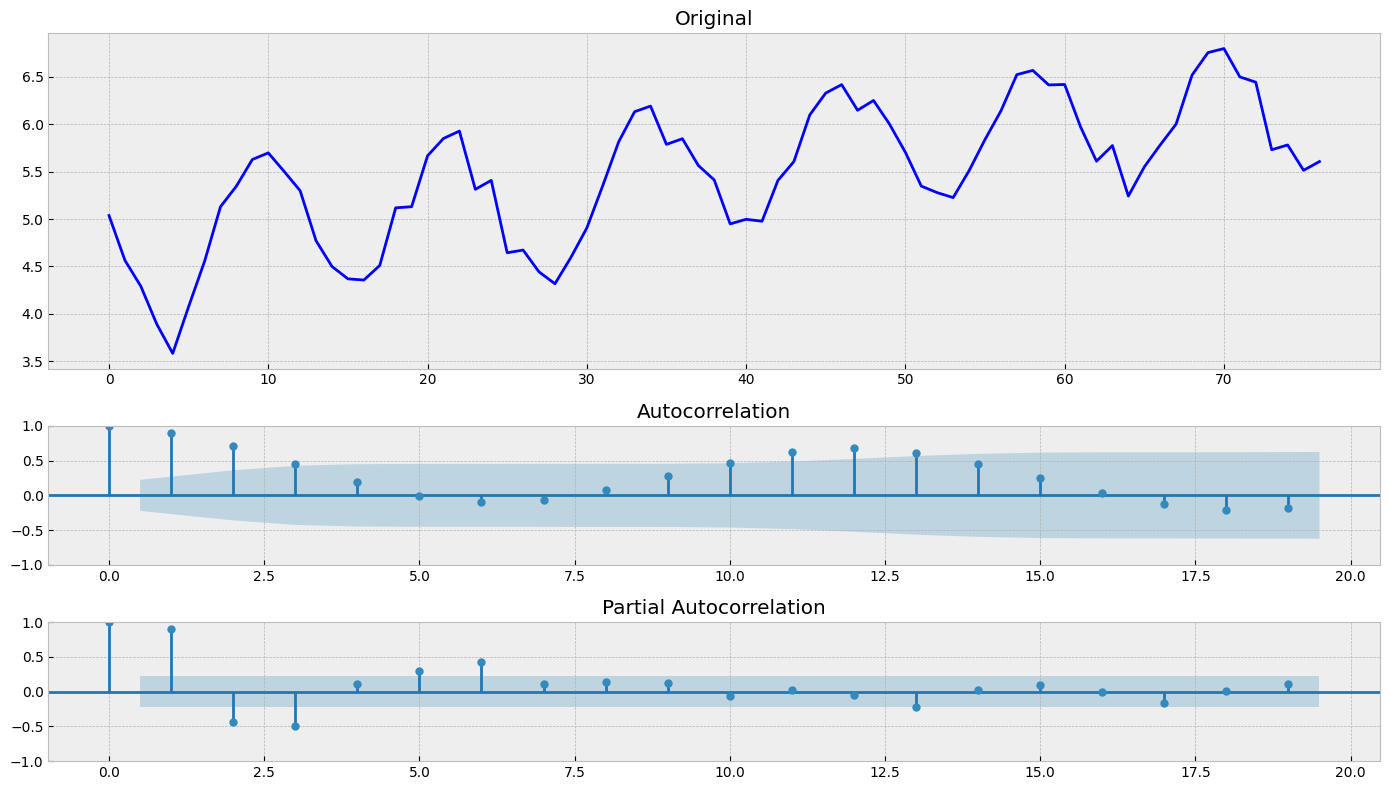

In [17]:
tsplot(series_2)

Уберем тренд с помошью дифференцирования.

In [18]:
series_2 = series_2[1:] - series_2[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


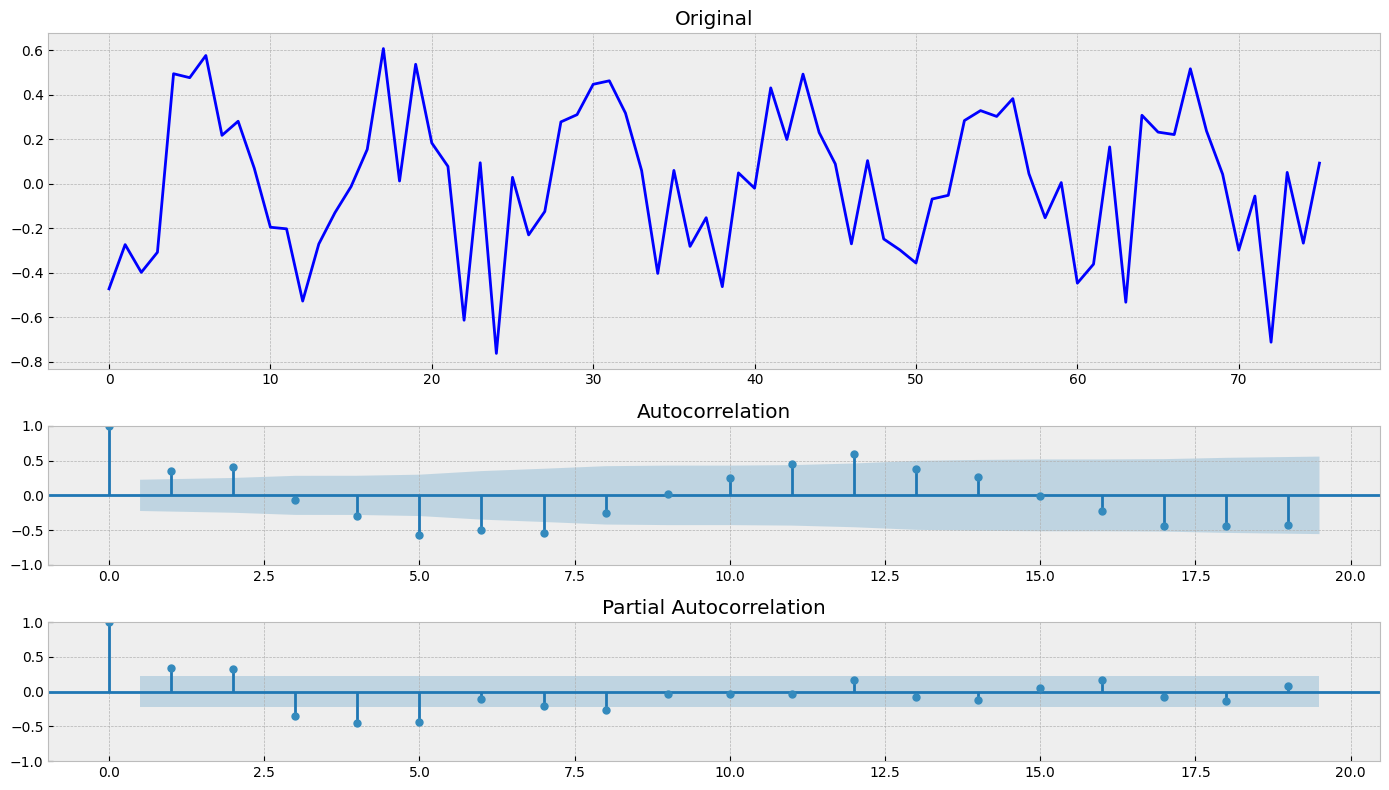

In [19]:
tsplot(series_2)

В целом результат теста Дики-Фуллера и графики коррелограмм говорят о стационарности ряда.

Можно еще убрать сезонность в данных

In [26]:
series_2 = series_2[6:] - series_2[:-6]

Results of Dickey-Fuller Test:
Test Statistic                 -3.703354
p-value                         0.004066
#Lags Used                      9.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


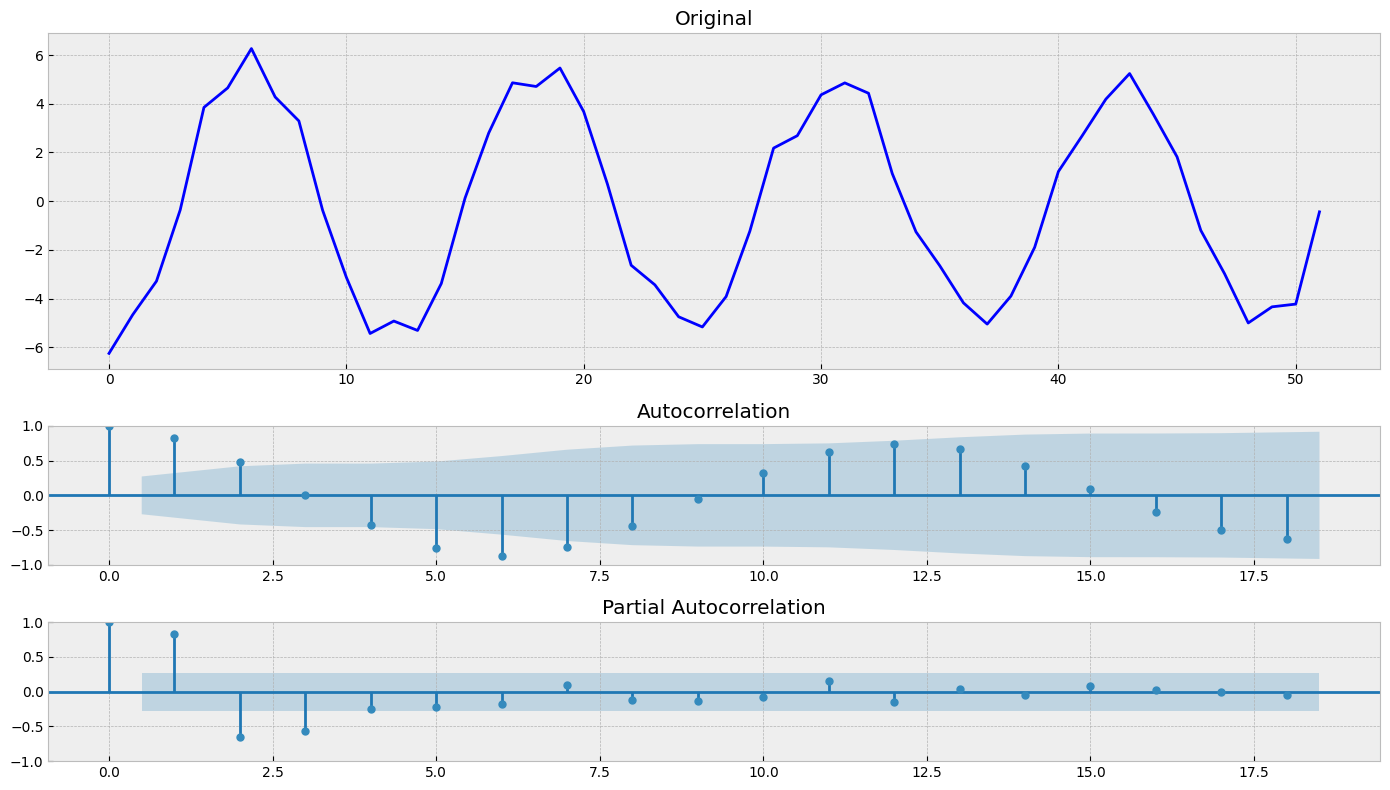

In [27]:
tsplot(series_2)

Теперь результат лучше, ряд стационарен.

## 3. monthly-boston-armed-robberies-j

In [28]:
series_3 = pd.read_csv("monthly-boston-armed-robberies-j.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


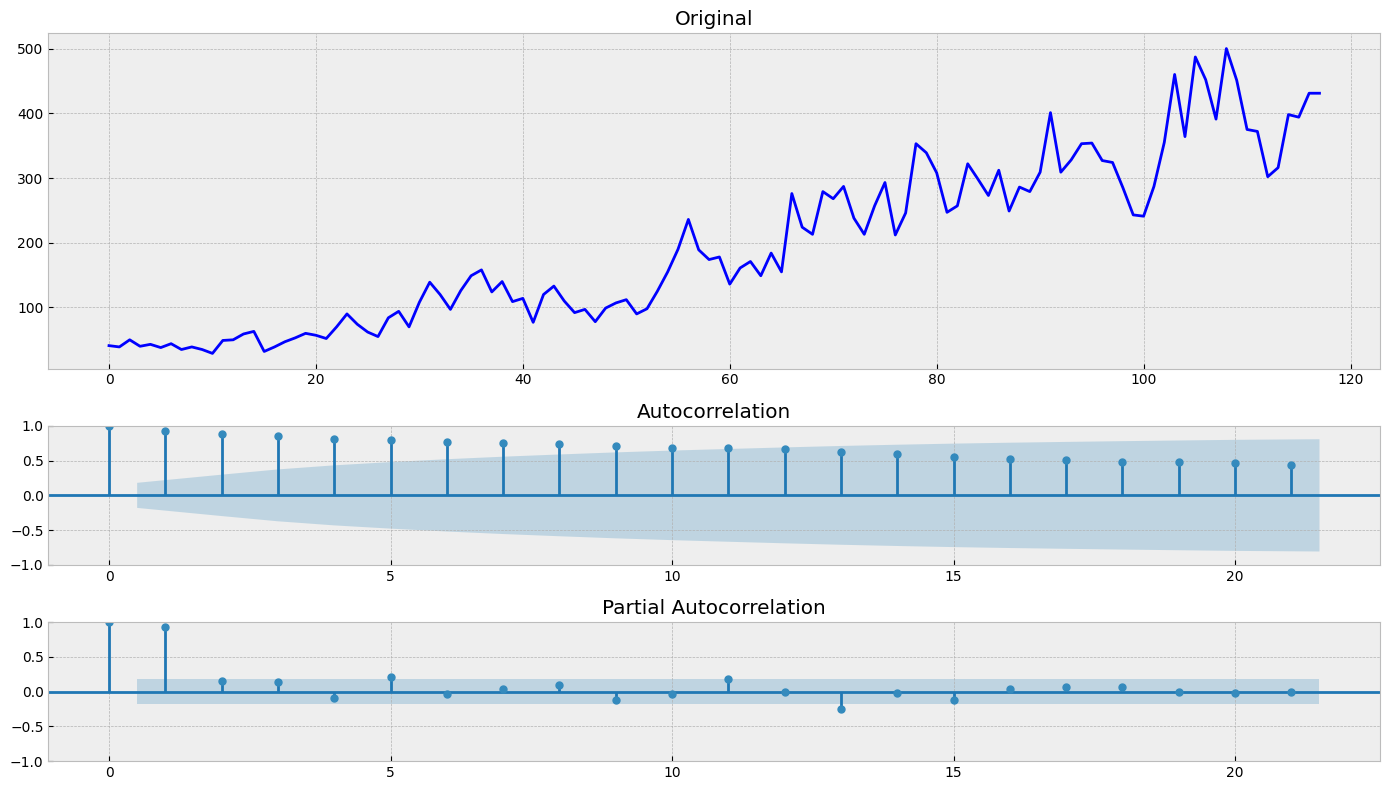

In [29]:
tsplot(series_3)

Судя по результатам теста Дики-Фуллера и по графикам коррелограмм ряд нестационарен. Присутствует тренд.

Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [30]:
series_3 = boxcox(series_3, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


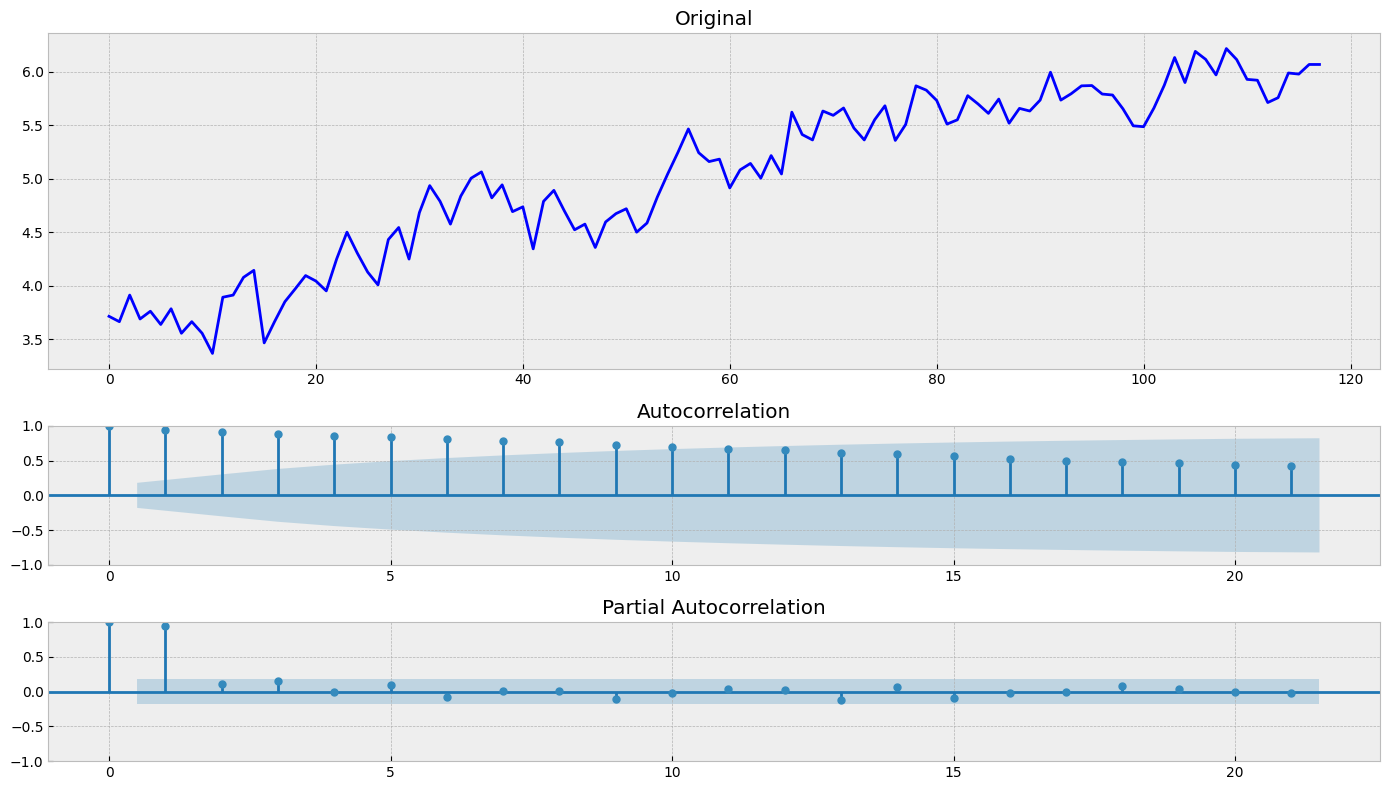

In [31]:
tsplot(series_3)

Уберем тренд с помошью дифференцирования.

In [32]:
series_3 = series_3[1:] - series_3[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


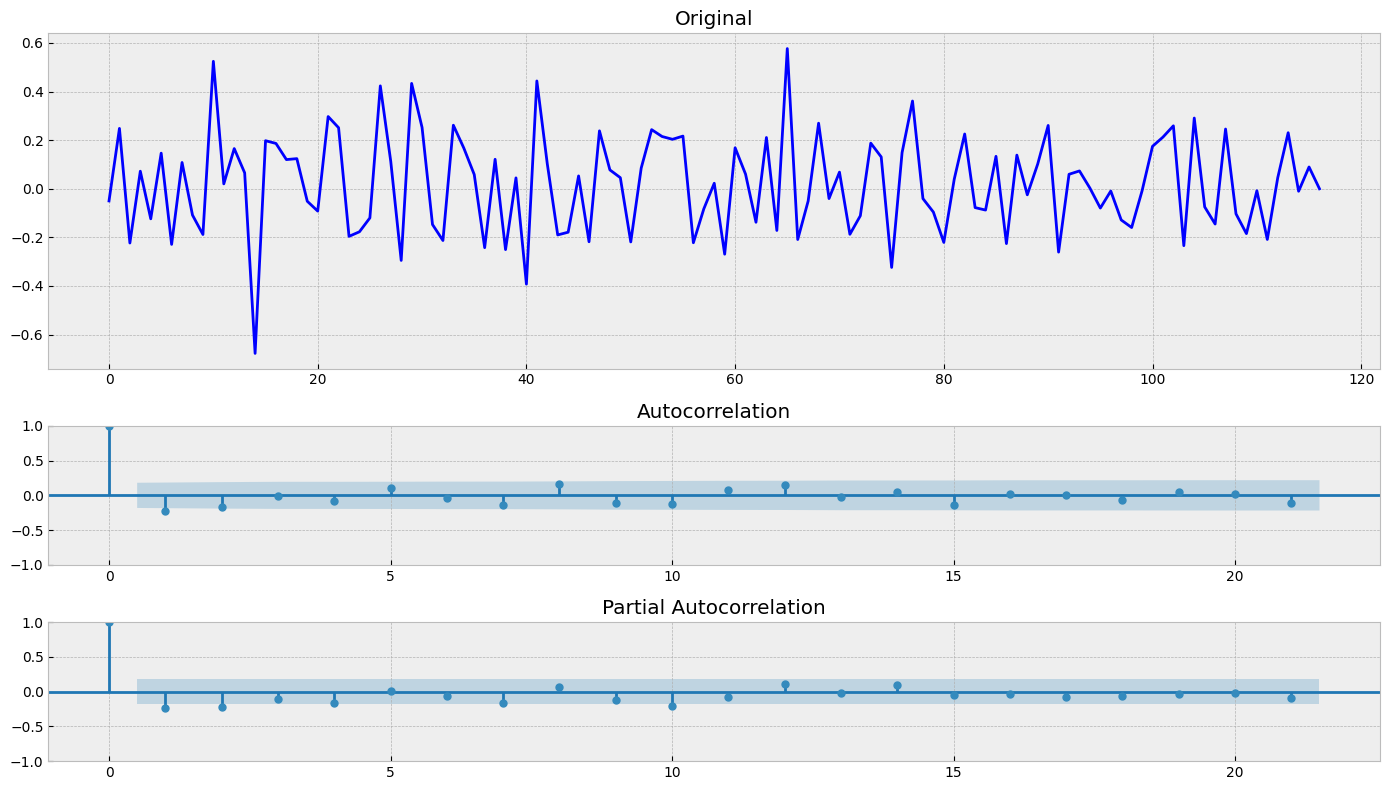

In [33]:
tsplot(series_3)

Результат теста Дики-Фуллера и графики коррелограмм говорят о стационарности ряда.


## 4. mean-monthly-air-temperature-deg

In [39]:
series_4 = pd.read_csv("mean-monthly-air-temperature-deg.csv")['Deg']

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


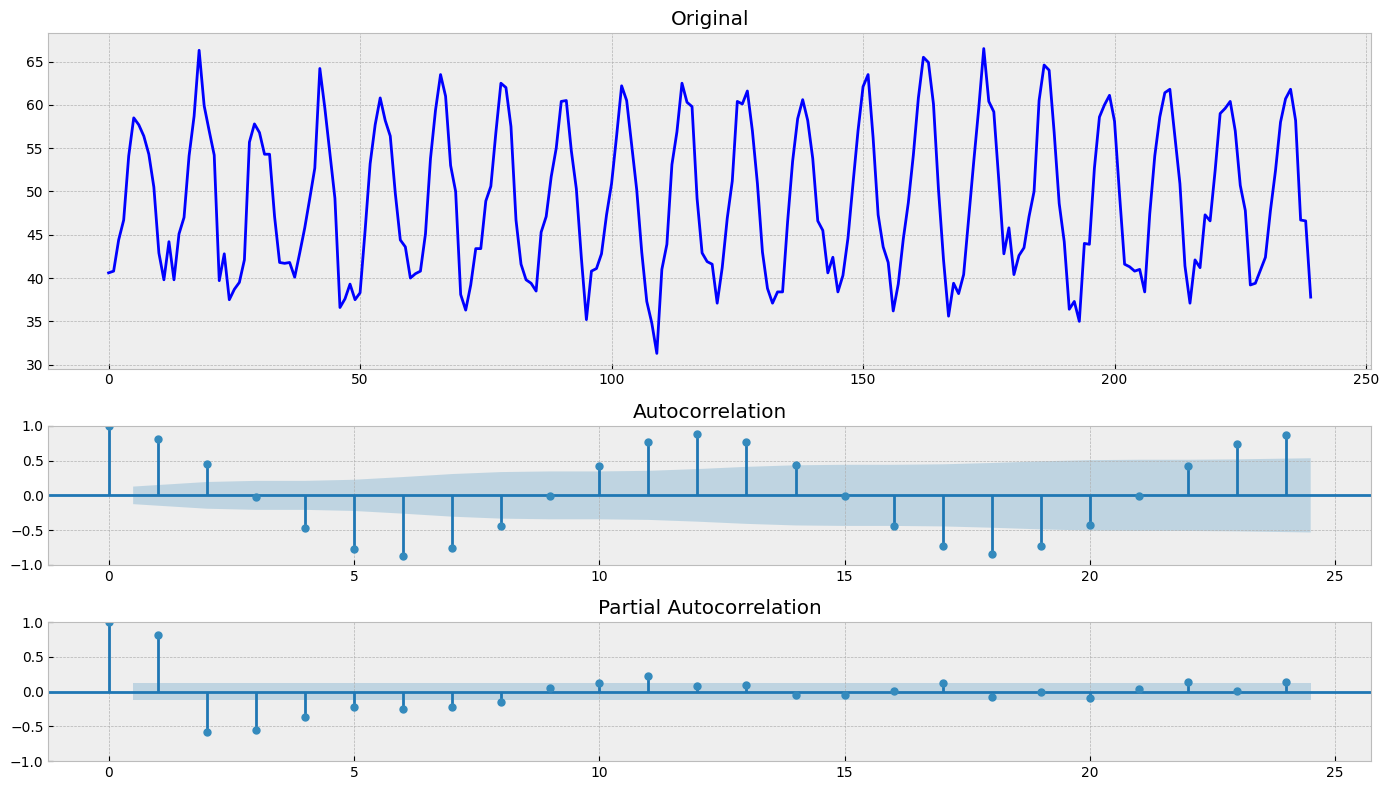

In [40]:
tsplot(series_4)

В целом по визуальной оценке и по результатам теста Дики-Фуллера можно сказать, что ряд стационарен. Для улучшения результата можно убрать изменение дисперсии при помощи преобразования Бокса-Кокса.

In [43]:
series_4 = boxcox(series_4, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -3.859318
p-value                          0.002356
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


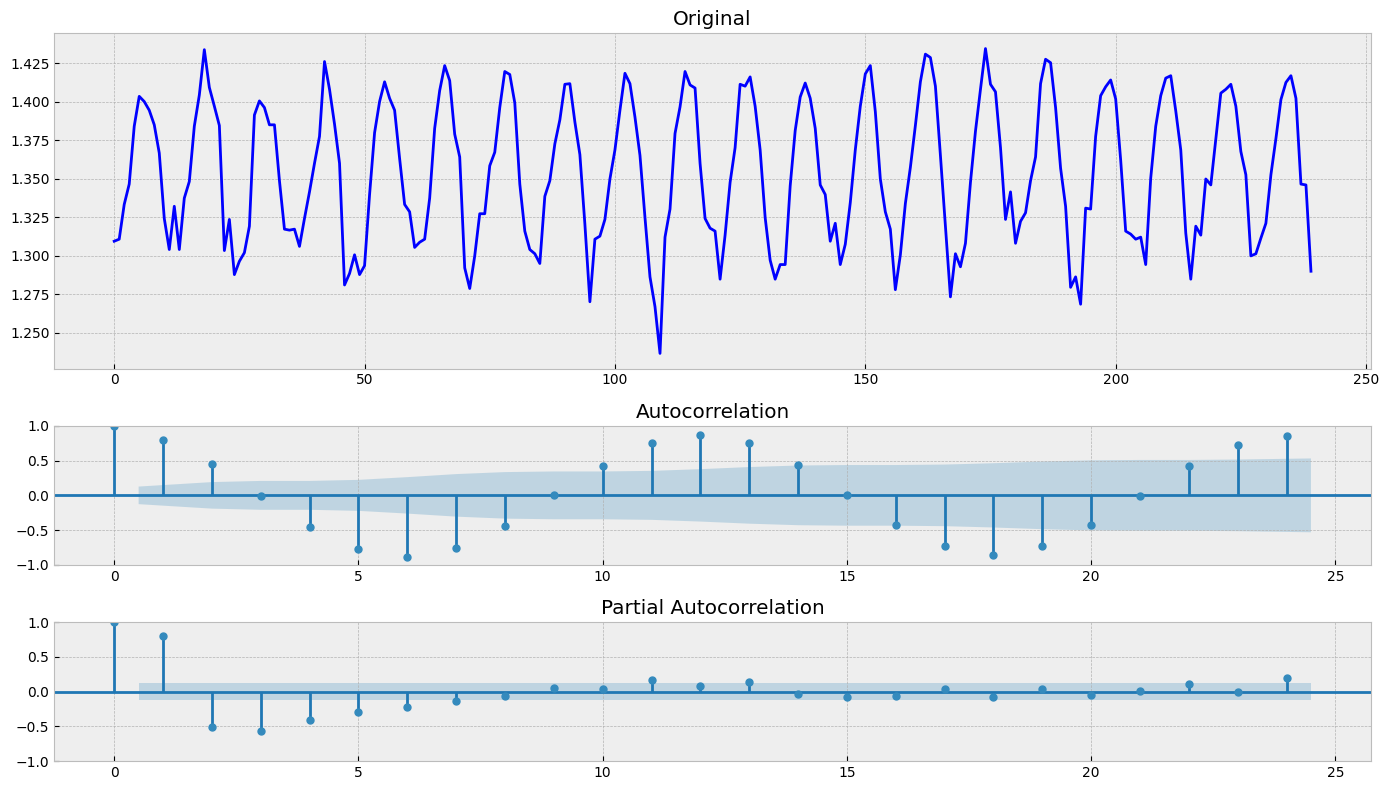

In [44]:
tsplot(series_4)

Теперь результат лучше, ряд стационарен.

## 5. weekly-closings-of-the-dowjones

In [48]:
series_5 = pd.read_csv("weekly-closings-of-the-dowjones-.csv")['Close']

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


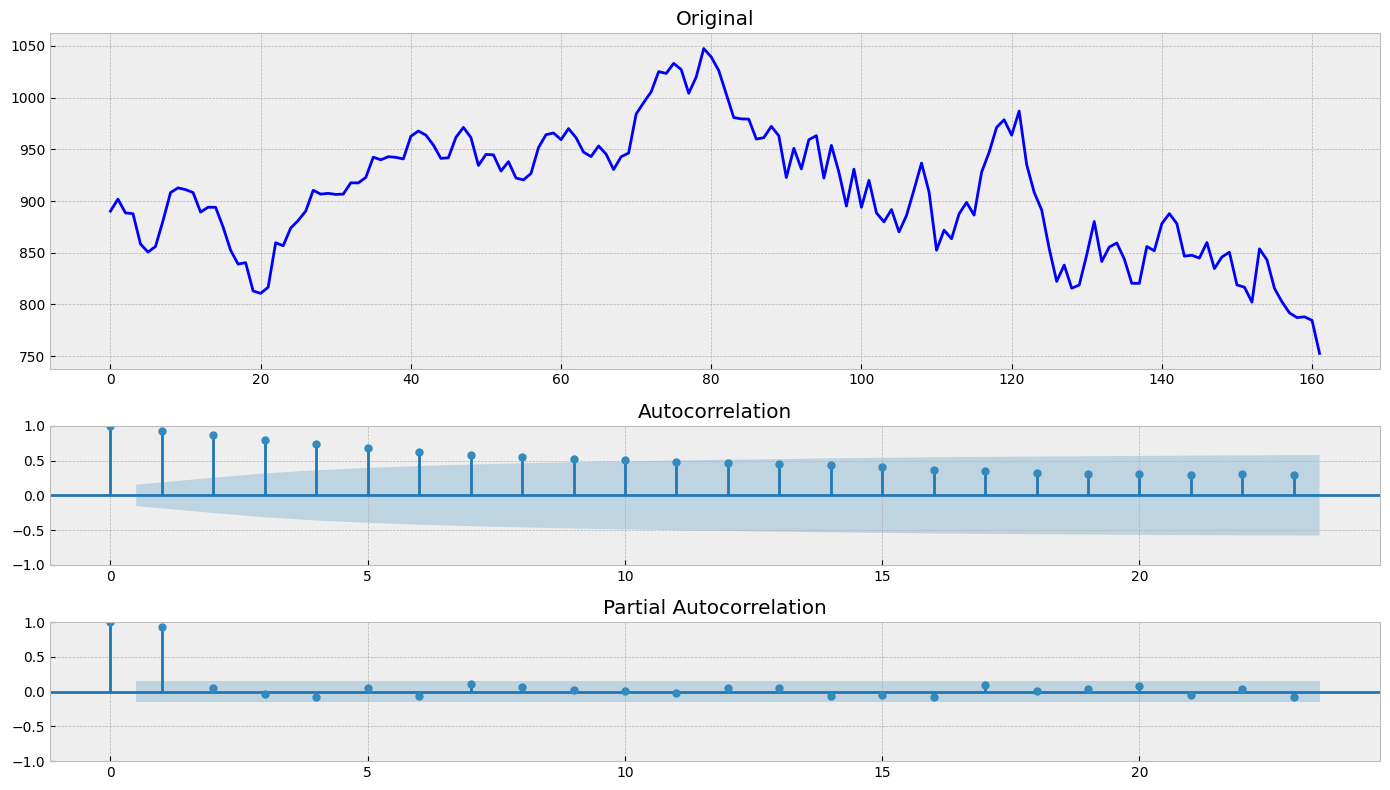

In [49]:
tsplot(series_5)

Судя по результатам теста Дики-Фуллера ряд нестационарен.

Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [54]:
series_5 = boxcox(series_5, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.191230
p-value                          0.677357
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


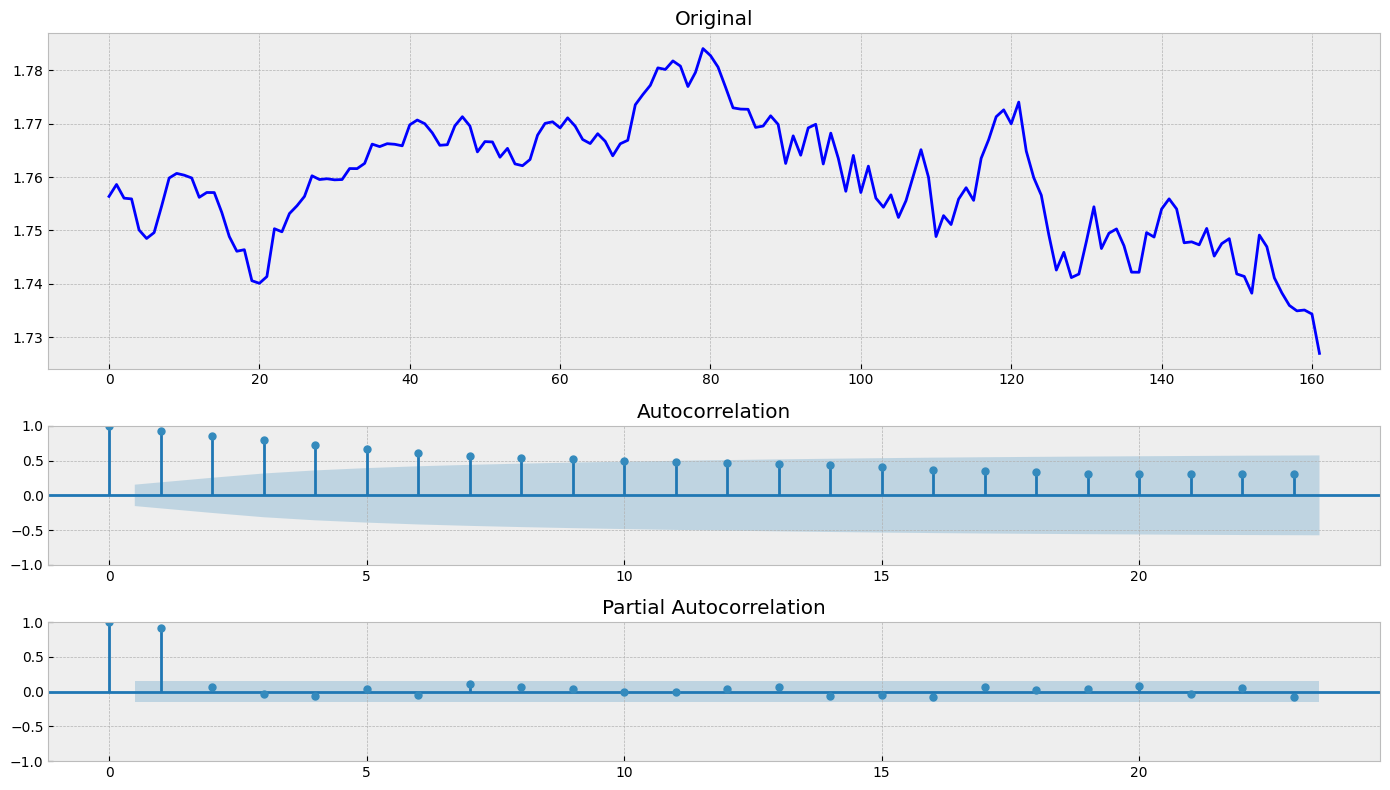

In [55]:
tsplot(series_5)

Преобразования Бокса-Кокса оказалось неэффективным для данного временного ряда. Можно попробовать дифференцировать данные.

In [57]:
series_5 = series_5[1:] - series_5[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -1.298840e+01
p-value                        2.846268e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


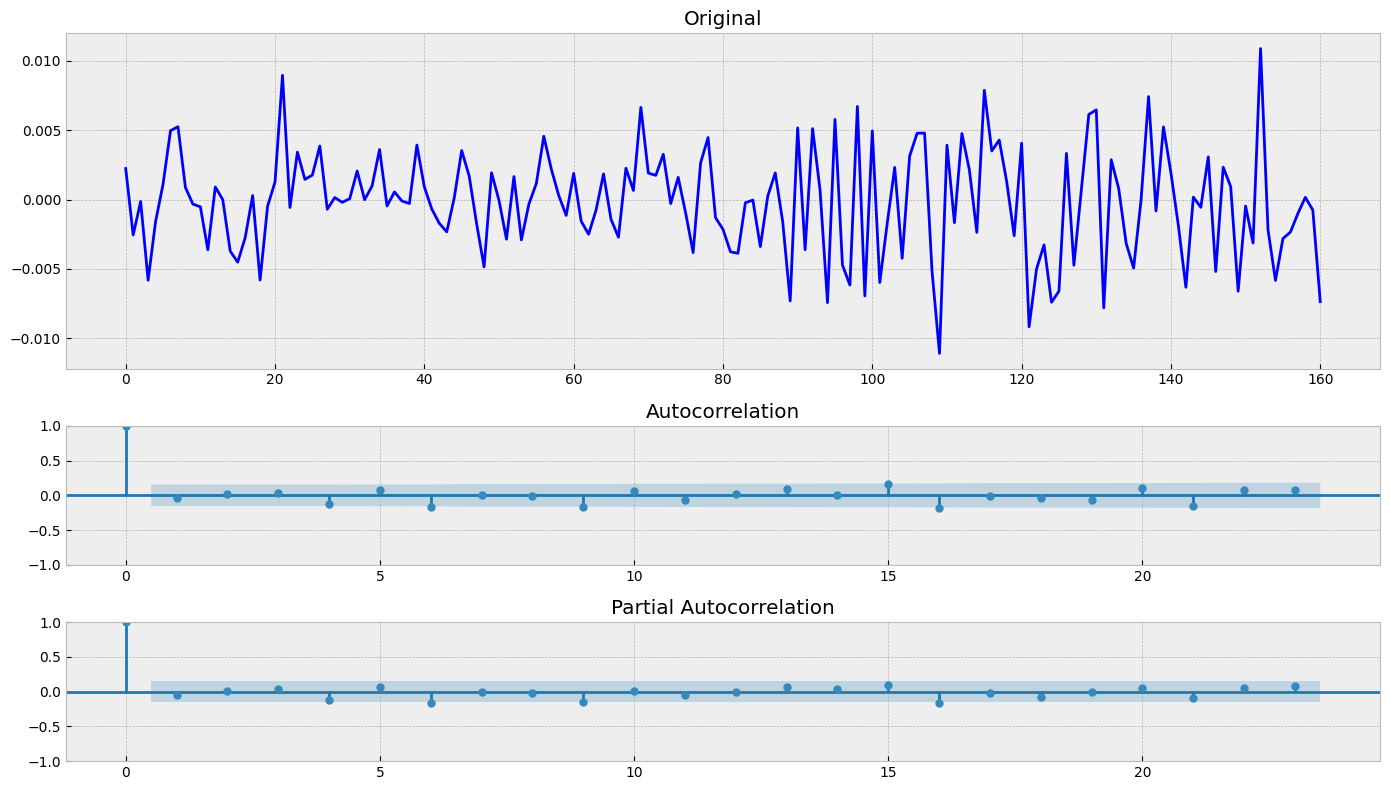

In [58]:
tsplot(series_5)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда

## 6. daily-total-female-births-in-cal

In [59]:
series_6 = pd.read_csv("daily-total-female-births-in-cal.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


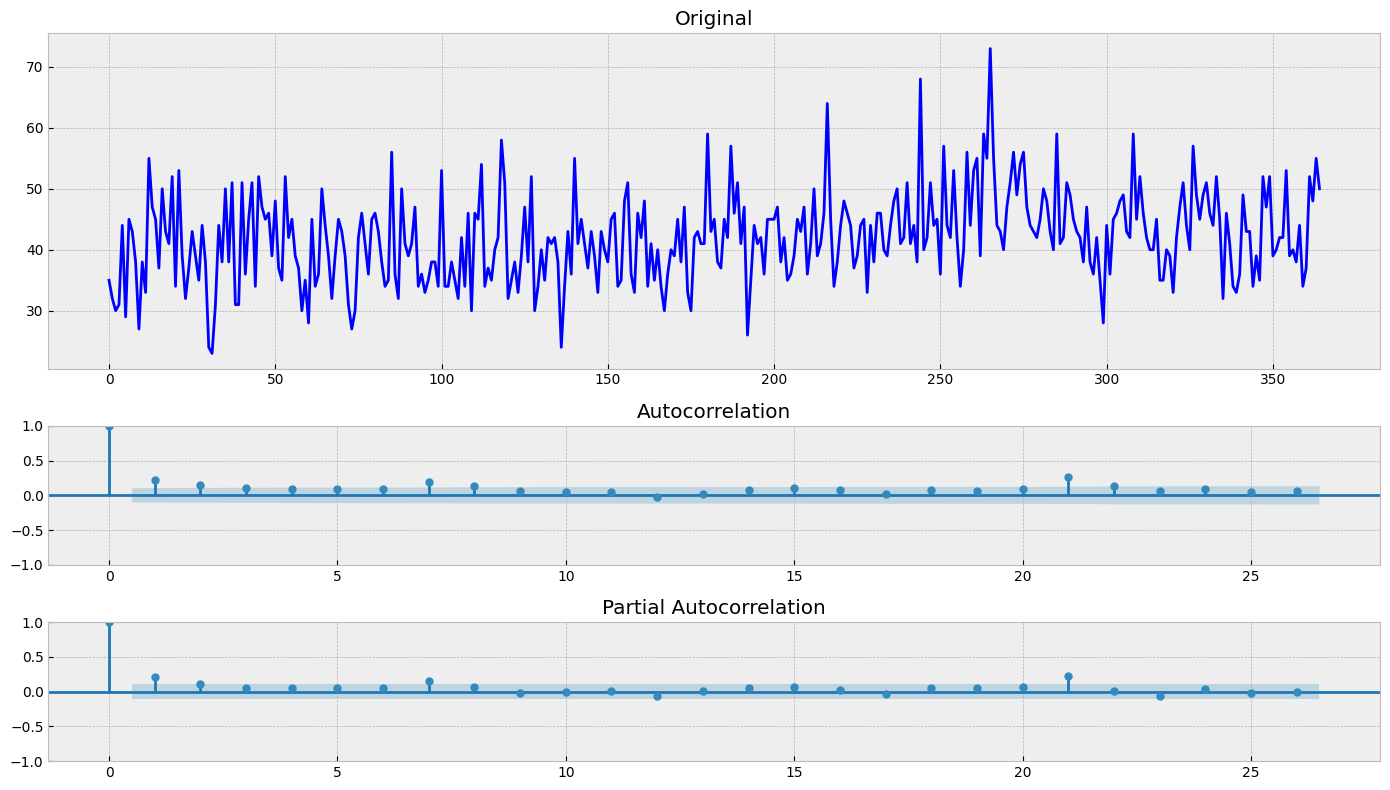

In [60]:
tsplot(series_6)

Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда. Преобразования не требуются.